## Import necessary files

In [1]:
import tensorflow as tf
import torch
import numpy as np
import matplotlib.pyplot as plt
from training.utils import get_var_name, training_session_unity, plot_multiple_sessions, get_root_dir

print(torch.__version__)
print(tf.__version__)
print(np.__version__)

0.4.0
1.13.1
1.15.3


## Import classes containing algorithm and model 

In [2]:
from unityagents import UnityEnvironment
from models.ddpg_agent import Agent, SoftAgent
from models.a2c_agent import ACAgent
from training.ddpg import ddpg
from training.a2c import a2c

## Load environment

In [3]:
env = UnityEnvironment(file_name="Reacher_Linux_multi/Reacher_Linux/Reacher.x86_64", no_graphics = True)
seed=0

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

train_mode = True
action_size = brain.vector_action_space_size
env_info = env.reset(train_mode=train_mode)[brain_name] # reset the environment
state = env_info.vector_observations[0]
state_size = len(state)
num_agents = len(env_info.agents)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


## Settings and model selection

In [4]:
n_episodes = 500
max_t = 1000
n_training_sessions = 1
model_type = 'ddpg'

## Train and plot the scores

Episode 1	Total Average Score: 0.01	Mean: 0.01	Min: 0.00	Max: 0.12	Duration: 4.97
Episode 2	Total Average Score: 0.30	Mean: 0.58	Min: 0.14	Max: 1.53	Duration: 4.96
Episode 3	Total Average Score: 0.41	Mean: 0.63	Min: 0.00	Max: 3.12	Duration: 5.39
Episode 4	Total Average Score: 0.30	Mean: 0.00	Min: 0.00	Max: 0.00	Duration: 5.42
Episode 5	Total Average Score: 0.24	Mean: 0.01	Min: 0.00	Max: 0.11	Duration: 5.51
Episode 6	Total Average Score: 0.23	Mean: 0.14	Min: 0.00	Max: 0.60	Duration: 5.52
Episode 7	Total Average Score: 0.27	Mean: 0.55	Min: 0.00	Max: 1.50	Duration: 5.19
Episode 8	Total Average Score: 0.31	Mean: 0.52	Min: 0.00	Max: 1.49	Duration: 5.18
Episode 9	Total Average Score: 0.36	Mean: 0.79	Min: 0.12	Max: 1.50	Duration: 5.23
Episode 10	Total Average Score: 0.43	Mean: 1.08	Min: 0.00	Max: 3.31	Duration: 5.38
Episode 10	Total Average Score: 0.43
Episode 11	Total Average Score: 0.49	Mean: 1.11	Min: 0.50	Max: 1.59	Duration: 5.38
Episode 12	Total Average Score: 0.52	Mean: 0.78	Min: 0.06	M

Episode 96	Total Average Score: 4.54	Mean: 12.17	Min: 6.80	Max: 24.20	Duration: 8.55
Episode 97	Total Average Score: 4.60	Mean: 10.53	Min: 5.65	Max: 14.64	Duration: 8.24
Episode 98	Total Average Score: 4.67	Mean: 11.49	Min: 6.40	Max: 19.37	Duration: 8.59
Episode 99	Total Average Score: 4.75	Mean: 13.09	Min: 9.36	Max: 18.58	Duration: 8.64
Episode 100	Total Average Score: 4.83	Mean: 12.11	Min: 8.57	Max: 15.35	Duration: 8.59
Episode 100	Total Average Score: 4.83
Episode 101	Total Average Score: 4.94	Mean: 11.73	Min: 1.73	Max: 17.29	Duration: 9.01
Episode 102	Total Average Score: 5.06	Mean: 12.18	Min: 0.07	Max: 24.47	Duration: 8.77
Episode 103	Total Average Score: 5.19	Mean: 14.05	Min: 7.95	Max: 24.56	Duration: 8.29
Episode 104	Total Average Score: 5.34	Mean: 14.53	Min: 8.96	Max: 20.09	Duration: 8.98
Episode 105	Total Average Score: 5.48	Mean: 13.81	Min: 9.03	Max: 20.34	Duration: 8.95
Episode 106	Total Average Score: 5.63	Mean: 15.06	Min: 8.90	Max: 29.24	Duration: 8.38
Episode 107	Total Av

Episode 186	Total Average Score: 22.25	Mean: 28.66	Min: 22.67	Max: 34.19	Duration: 8.14
Episode 187	Total Average Score: 22.45	Mean: 29.94	Min: 21.38	Max: 35.99	Duration: 8.19
Episode 188	Total Average Score: 22.62	Mean: 28.40	Min: 20.09	Max: 34.40	Duration: 8.94
Episode 189	Total Average Score: 22.80	Mean: 27.35	Min: 18.21	Max: 32.62	Duration: 8.20
Episode 190	Total Average Score: 23.01	Mean: 30.55	Min: 26.02	Max: 35.99	Duration: 9.06
Episode 190	Total Average Score: 23.01
Episode 191	Total Average Score: 23.19	Mean: 28.03	Min: 25.03	Max: 32.38	Duration: 8.53
Episode 192	Total Average Score: 23.37	Mean: 27.95	Min: 19.35	Max: 38.85	Duration: 8.51
Episode 193	Total Average Score: 23.54	Mean: 27.98	Min: 12.39	Max: 34.88	Duration: 8.50
Episode 194	Total Average Score: 23.70	Mean: 27.60	Min: 19.57	Max: 34.66	Duration: 9.20
Episode 195	Total Average Score: 23.89	Mean: 28.75	Min: 18.90	Max: 33.37	Duration: 8.39
Episode 196	Total Average Score: 24.05	Mean: 28.90	Min: 18.43	Max: 35.78	Duration

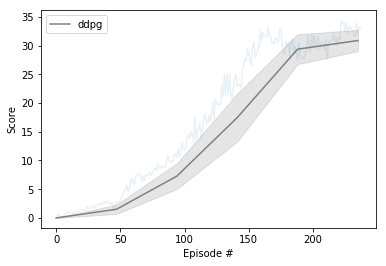

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
if model_type == 'ddpg':
    ddpg_agent = Agent(state_size, action_size, seed)
    scores_vanilla_x, scores_vanilla_mean, scores_vanilla_std, scores_vanilla_y = training_session_unity(ddpg,
                                                                                                         ddpg_agent,
                                                                                                         env,
                                                                                                         brain_name,
                                                                                                         env_info,
                                                                                                         get_var_name(
                                                                                                             ddpg),
                                                                                                         n_episodes,
                                                                                                         max_t)
    plot_multiple_sessions(scores_vanilla_x, scores_vanilla_mean, scores_vanilla_std, label=get_var_name(ddpg),
                           color='gray')
    plt.plot(np.arange(len(scores_vanilla_y)), scores_vanilla_y, alpha=.1)
elif model_type == 'a2c':
    a2c_agent = ACAgent(state_size, action_size, seed, num_agents, rollout_length=5,lr=1e-4,lr_decay=.95,gamma=.95,value_loss_weight=1,gradient_clip=5)
    scores_a2c_x, scores_a2c_mean, scores_a2c_std, scores_a2c_y = training_session_unity(a2c, a2c_agent, env, brain_name, env_info, get_var_name(ddpg), n_episodes, max_t)
    plot_multiple_sessions(scores_a2c_x, scores_a2c_mean, scores_a2c_std, label=get_var_name(a2c), color='blue')
    plt.plot(np.arange(len(scores_a2c_y)), scores_a2c_y, alpha=.1)

plt.legend()
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig(get_root_dir() + '/unity_environment_model_{}_batch_size_128.png'.format(model_type))
plt.show()

## Training session

We can call the method training session with an algorithm of our choice.

In [ ]:
def training_session_unity(algorithm, agent, env, brain_name, env_info, model_name, n_episodes, max_t, buckets=5):
    num_agents = len(env_info.agents)
    scores_y = np.asarray(algorithm(agent, env, num_agents, True, brain_name, model_name, n_episodes, max_t))
    print(scores_y)
    solved_episodes = len(scores_y)
    bucket_size = solved_episodes // buckets
    scores_mean = np.zeros(solved_episodes+1)
    scores_std = np.zeros(solved_episodes+1)
    scores_x = np.arange(buckets+1) * (solved_episodes // buckets)

    for bucket in range(buckets):
        start = bucket*bucket_size
        end = start + bucket_size
        scores_mean[bucket+1] = scores_y[start:end].mean(0)
        scores_std[bucket+1] = scores_y[start:end].std(0)

    return scores_x, scores_mean, scores_std, scores_y

## Algorithms

The current implemented algorithms are A2C and DDPG. The difference is that the A2C algorithm also requires to store the probabilities for the actor and state values for the critic network. 

In [5]:
def a2c(agent, env, num_agents, train_mode, brain_name, model_name, n_episodes=2000, max_t=1000, print_every=10, learn_every=20, num_learn=10, goal_score=30, rollout_length=5):
    total_scores_deque = deque(maxlen=100)
    total_scores = []

    for i_episode in range(1, n_episodes + 1):
        # Reset Env and Agent
        env_info = env.reset(train_mode=train_mode)[brain_name]  # reset the environment
        states = env_info.vector_observations  # get the current state (for each agent)
        scores = np.zeros(num_agents)  # initialize the score (for each agent)
        #agent.reset()

        start_time = time.time()
        steps_taken = 0
        for t in range(max_t):
            steps_taken +=1
            actions, log_probs, state_values = agent.act(states)      # select actions for 20 envs
            env_inst = env.step(actions)[brain_name]     # send the actions to the environment
            next_states = env_inst.vector_observations                          # get the next states
            rewards = env_inst.rewards                                          # get the rewards
            dones = env_inst.local_done                                         # see if episode has finished
            not_dones = [1-done for done in dones]        

            for state, action, reward, next_state, not_done, log_prob, state_value in zip(states, actions, rewards, next_states, not_dones, log_probs, state_values):
                agent.step(state, action, reward, next_state, not_done, log_prob, state_value)  # send actions to the agent


In [6]:
def ddpg(agent, env, num_agents, train_mode, brain_name, model_name, n_episodes=2000, max_t=1000, print_every=10, learn_every=20, num_learn=10, goal_score=1):
    total_scores_deque = deque(maxlen=100)
    total_scores = []

    for i_episode in range(1, n_episodes + 1):
        # Reset Env and Agent
        env_info = env.reset(train_mode=train_mode)[brain_name]  # reset the environment
        states = env_info.vector_observations  # get the current state (for each agent)
        scores = np.zeros(num_agents)  # initialize the score (for each agent)
        agent.reset()

        start_time = time.time()

        for t in range(max_t):
            actions = agent.act(states)

            env_info = env.step(actions)[brain_name]  # send all actions to the environment
            next_states = env_info.vector_observations  # get next state (for each agent)
            rewards = env_info.rewards  # get reward (for each agent)

            dones = env_info.local_done  # see if episode finished

            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done)  # send actions to the agent

            scores += env_info.rewards  # update the score (for each agent)
            states = next_states  # roll over states to next time step

            if t % learn_every == 0:
                for _ in range(num_learn):
                    agent.start_learn()

            if np.any(dones):  # exit loop if episode finished
                break

